In [90]:
import math
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from my_ecog_utils import read_with_annotations, get_raw_power_bands_narrow

In [91]:
pts_w_control_and_stim = [103, 106, 109, 110, 111, 112, 113, 115]
pts_w_L_Hip = [109, 110, 111, 112, 113, 115]

In [92]:
mne.set_log_level('WARNING')
results_dict_list = []
for pt_num in pts_w_control_and_stim:
    raw = read_with_annotations(pt_num, 'control')
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    if pt_num == 103:
        raw.rename_channels(lambda s: 'L' + s)
    if pt_num == 106:
        raw.rename_channels(lambda s: 'L' + s.upper())
    elif pt_num == 108:
        raw.rename_channels(lambda s: s.replace('HIP', 'Hip'))
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    for chan in raw.ch_names:
        if chan.startswith('L'):
            powers = get_raw_power_bands_narrow(raw, picks=chan)
            results_dict_list.append({'ID': pt_num, 'Channel': chan, 'Stim': False, **powers})

c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 35 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)
c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)
c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(saved_ann)
c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)
c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


In [93]:
for pt_num in pts_w_control_and_stim:
    raw = read_with_annotations(pt_num, 'stimulated')
    raw.load_data()
    raw.notch_filter(62.5)

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    if pt_num == 103:
        raw.rename_channels(lambda s: 'L' + s)
    if pt_num == 106:
        raw.rename_channels(lambda s: 'L' + s.upper())
    elif pt_num == 108:
        raw.rename_channels(lambda s: s.replace('HIP', 'Hip'))
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    for chan in raw.ch_names:
        if chan.startswith('L'):
            powers = get_raw_power_bands_narrow(raw, picks=chan)
            results_dict_list.append({'ID': pt_num, 'Channel': chan, 'Stim': True, **powers})

c:\Users\seand\eeg_proj\ecog\my_ecog_utils.py:11: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(saved_ann)


In [94]:
results_before_after = pd.DataFrame(results_dict_list)
results_before_after

ID         Channel   Stim         Delta         Theta          Beta  \
0   103  LMIns1 - MIns2  False  5.334478e-12  6.752510e-12  2.400595e-12   
1   103  LMIns3 - MIns4  False  2.373591e-12  2.870626e-12  1.035815e-12   
2   103  LPIns1 - PIns2  False  1.101493e-10  3.250446e-11  9.157710e-12   
3   103  LPIns3 - PIns4  False  2.664857e-10  1.072548e-10  3.514687e-11   
4   106    LLPS1 - LPS2  False  1.178241e-12  3.039395e-12  3.400410e-12   
5   106    LLPS3 - LPS4  False  5.135994e-12  9.262616e-12  6.085720e-12   
6   106  LLPIH1 - LPIH2  False  2.028350e-11  2.285492e-11  1.156179e-11   
7   106  LLPIH3 - LPIH4  False  2.183871e-12  4.616156e-12  2.249263e-12   
8   109   LHip1 - LHip2  False  1.163901e-09  4.494606e-10  3.883547e-11   
9   109   LHip3 - LHip4  False  1.559218e-10  1.272655e-10  2.710693e-11   
10  110   LHip1 - LHip2  False  3.454764e-10  4.477400e-11  9.649865e-12   
11  110   LHip3 - LHip4  False  6.744284e-10  6.638673e-11  5.569094e-11   
12  111   LHip1 - LHip2  False  1.338707e-11  2.965303e-11  9.019107e-12   
13  111   LHip3 - LHip4  False  8.348386e-12  3.048997e-11  1.074786e-11   
14  112   LHip1 - LHip2  False  5.610167e-11  1.745307e-11  7.253556e-12   
15  112   LHip3 - LHip4  False  3.593387e-11  4.842257e-11  2.028130e-11   
16  113   LHip1 - LHip2  False  3.174448e-10  1.373422e-10  9.592953e-11   
17  113   LHip3 - LHip4  False  1.439717e-10  5.325533e-11  2.746695e-11   
18  115   LHip1 - LHip2  False  3.233073e-10  5.838884e-11  1.716721e-11   
19  115   LHip3 - LHip4  False  1.439433e-10  3.984263e-11  1.442609e-11   
20  103  LMIns1 - MIns2   True  6.868700e-10  3.803500e-11  3.449036e-12   
21  103  LMIns3 - MIns4   True  4.911190e-10  3.102013e-11  2.656972e-12   
22  103  LPIns1 - PIns2   True  5.188758e-10  1.100715e-10  1.381067e-11   
23  103  LPIns3 - PIns4   True  7.534356e-10  1.533130e-10  3.785614e-11   
24  106    LLPS1 - LPS2   True  5.031696e-11  4.705879e-12  3.335665e-12   
25  106    LLPS3 - LPS4   True  5.161816e-11  7.086327e-12  4.478359e-12   
26  106  LLPIH4 - LPIH1   True  6.682090e-11  2.137554e-11  9.630084e-12   
27  106  LLPIH4 - LPIH3   True  5.178243e-11  5.765322e-12  2.409910e-12   
28  109   LHip1 - LHip2   True  3.024115e-10  2.673379e-10  2.182999e-11   
29  109   LHip3 - LHip4   True  5.361161e-11  7.644483e-11  4.736004e-12   
30  110   LHip1 - LHip2   True  2.066231e-10  6.623963e-11  6.573436e-11   
31  110   LHip3 - LHip4   True  5.349918e-10  5.160028e-10  1.625588e-10   
32  111   LHip1 - LHip2   True  2.385236e-10  2.901353e-10  6.746864e-11   
33  111   LHip3 - LHip4   True  1.842976e-11  3.359064e-11  1.767399e-11   
34  112   LHip1 - LHip2   True  6.838634e-11  1.680484e-11  6.127499e-12   
35  112   LHip3 - LHip4   True  3.707726e-11  1.915593e-11  6.232864e-12   
36  113   LHip1 - LHip2   True  1.762365e-10  1.086949e-10  6.195791e-11   
37  113   LHip3 - LHip4   True  8.009074e-11  2.615578e-11  1.151751e-11   
38  115   LHip1 - LHip2   True  2.518881e-10  4.043629e-11  8.447242e-12   
39  115   LHip3 - LHip4   True  6.124814e-11  2.637776e-11  7.537026e-12   

        GammaLow      GammaMed     GammaHigh    GammaXHigh  
0   1.632563e-13  3.495573e-14  2.701347e-14  2.273229e-14  
1   1.236582e-13  3.945507e-14  1.782754e-14  2.074499e-14  
2   5.679416e-13  6.246544e-14  2.488824e-14  2.309292e-14  
3   5.728254e-12  1.981215e-13  6.041323e-14  3.793860e-14  
4   8.559645e-13  7.904150e-14  4.316582e-14  3.641022e-14  
5   1.800994e-12  1.286071e-13  5.532221e-14  3.961764e-14  
6   1.897172e-12  2.605418e-13  9.322029e-14  5.234623e-14  
7   9.877254e-13  8.336082e-14  4.480552e-14  3.630793e-14  
8   1.255613e-12  2.456386e-13  1.437344e-13  1.317719e-13  
9   1.187818e-12  1.162800e-13  6.603060e-14  4.830447e-14  
10  8.409477e-13  3.668186e-13  2.193428e-13  1.978756e-13  
11  1.371810e-12  3.578924e-13  2.333609e-13  1.959752e-13  
12  1.548742e-12  2.317484e-13  1.745030e-13  1.417759e-13  
13  1.227531e-12  2.536366e-13  1.

In [95]:
baselines = results_before_after[results_before_after['Stim'] == False]
stims = results_before_after[results_before_after['Stim'] == True]
rearranged = stims.merge(baselines, on=['ID', 'Channel'], suffixes=['_post', '_pre'])
rearranged = rearranged.drop(['Stim_post', 'Stim_pre'], axis='columns')
rearranged

ID         Channel    Delta_post    Theta_post     Beta_post  \
0   103  LMIns1 - MIns2  6.868700e-10  3.803500e-11  3.449036e-12   
1   103  LMIns3 - MIns4  4.911190e-10  3.102013e-11  2.656972e-12   
2   103  LPIns1 - PIns2  5.188758e-10  1.100715e-10  1.381067e-11   
3   103  LPIns3 - PIns4  7.534356e-10  1.533130e-10  3.785614e-11   
4   106    LLPS1 - LPS2  5.031696e-11  4.705879e-12  3.335665e-12   
5   106    LLPS3 - LPS4  5.161816e-11  7.086327e-12  4.478359e-12   
6   109   LHip1 - LHip2  3.024115e-10  2.673379e-10  2.182999e-11   
7   109   LHip3 - LHip4  5.361161e-11  7.644483e-11  4.736004e-12   
8   110   LHip1 - LHip2  2.066231e-10  6.623963e-11  6.573436e-11   
9   110   LHip3 - LHip4  5.349918e-10  5.160028e-10  1.625588e-10   
10  111   LHip1 - LHip2  2.385236e-10  2.901353e-10  6.746864e-11   
11  111   LHip3 - LHip4  1.842976e-11  3.359064e-11  1.767399e-11   
12  112   LHip1 - LHip2  6.838634e-11  1.680484e-11  6.127499e-12   
13  112   LHip3 - LHip4  3.707726e-11  1.915593e-11  6.232864e-12   
14  113   LHip1 - LHip2  1.762365e-10  1.086949e-10  6.195791e-11   
15  113   LHip3 - LHip4  8.009074e-11  2.615578e-11  1.151751e-11   
16  115   LHip1 - LHip2  2.518881e-10  4.043629e-11  8.447242e-12   
17  115   LHip3 - LHip4  6.124814e-11  2.637776e-11  7.537026e-12   

    GammaLow_post  GammaMed_post  GammaHigh_post  GammaXHigh_post  \
0    2.931096e-13   5.627193e-14    4.128642e-14     3.377603e-14   
1    3.230052e-13   1.180941e-13    8.282304e-14     7.584239e-14   
2    6.030229e-13   1.675773e-13    1.023898e-13     9.221426e-14   
3    4.793456e-12   2.802403e-13    1.340561e-13     9.713674e-14   
4    9.390558e-13   8.923986e-14    5.248688e-14     4.107490e-14   
5    1.249307e-12   1.253865e-13    7.232490e-14     4.776323e-14   
6    1.035236e-12   1.111554e-13    6.062049e-14     4.266762e-14   
7    6.294164e-13   9.610691e-14    5.203999e-14     3.718035e-14   
8    1.333967e-11   5.322268e-12    2.458299e-12     3.539264e-13   
9    1.731457e-11   6.098067e-12    2.523853e-12     4.320348e-13   
10   2.351622e-12   2.632745e-13    1.984486e-13     1.786982e-13   
11   1.593636e-12   2.544169e-13    1.774034e-13     1.706151e-13   
12   1.103727e-12   1.038213e-13    4.824663e-14     3.537933e-14   
13   7.008541e-13   1.040886e-13    4.106807e-14     3.116430e-14   
14   2.593997e-12   3.868336e-13    2.373831e-13     1.936457e-13   
15   1.679525e-12   3.604687e-13    2.386801e-13     2.089973e-13   
16   7.830600e-13   7.574855e-14    3.881669e-14     2.815849e-14   
17   6.974032e-13   5.979197e-14    3.314541e-14     2.373076e-14   

       Delta_pre     Theta_pre      Beta_pre  GammaLow_pre  GammaMed_pre  \
0   5.334478e-12  6.752510e-12  2.400595e-12  1.632563e-13  3.495573e-14   
1   2.373591e-12  2.870626e-12  1.035815e-12  1.236582e-13  3.945507e-14   
2   1.101493e-10  3.250446e-11  9.157710e-12  5.679416e-13  6.246544e-14   
3   2.664857e-10  1.072548e-10  3.514687e-11  5.728254e-12  1.981215e-13   
4   1.178241e-12  3.039395e-12  3.400410e-12  8.559645e-13  7.904150e-14   
5   5.135994e-12  9.262616e-12  6.085720e-12  1.800994e-12  1.286071e-13   
6   1.163901e-09  4.494606e-10  3.883547e-11  1.255613e-12  2.456386e-13   
7   1.559218e-10  1.272655e-10  2.710693e-11  1.187818e-12  1.162800e-13   
8   3.454764e-10  4.477400e-11  9.649865e-12  8.409477e-13  3.668186e-13   
9   6.744284e-10  6.638673e-11  5.569094e-11  1.371810e-12  3.578924e-13   
10  1.338707e-11  2.965303e-11  9.019107e-12  1.548742e-12  2.317484e-13   
11  8.348386e-12  3.048997e-11  1.074786e-11  1.227531e-12  2.536366e-13   
12  5.610167e-11  1.745307e-11  7.253556e-12  1.268681e-12  2.003086e-13   
13  3.593387e-11  4.842257e-11  2.028130e-11  9.343239e-13  1.576949e-13   
14  3.174448e-10  1.373422e-10  9.592953e-11  6.305432e-12  1.459887e-12   
15  1.439717e-10  5.325533e-11  2.746695e-11  6.231108e-12  1.204270e-12   
16  3.233073e-10  5.838884e-11  1.716721e-11  1.543934e-12  1.481194e-13   
17  1.439433e

In [96]:
freqs = results_before_after.columns[3:]

In [97]:
power_log_chg = rearranged.copy()
for freq in freqs:
    power_log_chg[freq+'_log_chg'] = np.log10(rearranged[freq+'_post']) - np.log10(rearranged[freq+'_pre'])
power_log_chg

ID         Channel    Delta_post    Theta_post     Beta_post  \
0   103  LMIns1 - MIns2  6.868700e-10  3.803500e-11  3.449036e-12   
1   103  LMIns3 - MIns4  4.911190e-10  3.102013e-11  2.656972e-12   
2   103  LPIns1 - PIns2  5.188758e-10  1.100715e-10  1.381067e-11   
3   103  LPIns3 - PIns4  7.534356e-10  1.533130e-10  3.785614e-11   
4   106    LLPS1 - LPS2  5.031696e-11  4.705879e-12  3.335665e-12   
5   106    LLPS3 - LPS4  5.161816e-11  7.086327e-12  4.478359e-12   
6   109   LHip1 - LHip2  3.024115e-10  2.673379e-10  2.182999e-11   
7   109   LHip3 - LHip4  5.361161e-11  7.644483e-11  4.736004e-12   
8   110   LHip1 - LHip2  2.066231e-10  6.623963e-11  6.573436e-11   
9   110   LHip3 - LHip4  5.349918e-10  5.160028e-10  1.625588e-10   
10  111   LHip1 - LHip2  2.385236e-10  2.901353e-10  6.746864e-11   
11  111   LHip3 - LHip4  1.842976e-11  3.359064e-11  1.767399e-11   
12  112   LHip1 - LHip2  6.838634e-11  1.680484e-11  6.127499e-12   
13  112   LHip3 - LHip4  3.707726e-11  1.915593e-11  6.232864e-12   
14  113   LHip1 - LHip2  1.762365e-10  1.086949e-10  6.195791e-11   
15  113   LHip3 - LHip4  8.009074e-11  2.615578e-11  1.151751e-11   
16  115   LHip1 - LHip2  2.518881e-10  4.043629e-11  8.447242e-12   
17  115   LHip3 - LHip4  6.124814e-11  2.637776e-11  7.537026e-12   

    GammaLow_post  GammaMed_post  GammaHigh_post  GammaXHigh_post  \
0    2.931096e-13   5.627193e-14    4.128642e-14     3.377603e-14   
1    3.230052e-13   1.180941e-13    8.282304e-14     7.584239e-14   
2    6.030229e-13   1.675773e-13    1.023898e-13     9.221426e-14   
3    4.793456e-12   2.802403e-13    1.340561e-13     9.713674e-14   
4    9.390558e-13   8.923986e-14    5.248688e-14     4.107490e-14   
5    1.249307e-12   1.253865e-13    7.232490e-14     4.776323e-14   
6    1.035236e-12   1.111554e-13    6.062049e-14     4.266762e-14   
7    6.294164e-13   9.610691e-14    5.203999e-14     3.718035e-14   
8    1.333967e-11   5.322268e-12    2.458299e-12     3.539264e-13   
9    1.731457e-11   6.098067e-12    2.523853e-12     4.320348e-13   
10   2.351622e-12   2.632745e-13    1.984486e-13     1.786982e-13   
11   1.593636e-12   2.544169e-13    1.774034e-13     1.706151e-13   
12   1.103727e-12   1.038213e-13    4.824663e-14     3.537933e-14   
13   7.008541e-13   1.040886e-13    4.106807e-14     3.116430e-14   
14   2.593997e-12   3.868336e-13    2.373831e-13     1.936457e-13   
15   1.679525e-12   3.604687e-13    2.386801e-13     2.089973e-13   
16   7.830600e-13   7.574855e-14    3.881669e-14     2.815849e-14   
17   6.974032e-13   5.979197e-14    3.314541e-14     2.373076e-14   

       Delta_pre  ...  GammaMed_pre  GammaHigh_pre  GammaXHigh_pre  \
0   5.334478e-12  ...  3.495573e-14   2.701347e-14    2.273229e-14   
1   2.373591e-12  ...  3.945507e-14   1.782754e-14    2.074499e-14   
2   1.101493e-10  ...  6.246544e-14   2.488824e-14    2.309292e-14   
3   2.664857e-10  ...  1.981215e-13   6.041323e-14    3.793860e-14   
4   1.178241e-12  ...  7.904150e-14   4.316582e-14    3.641022e-14   
5   5.135994e-12  ...  1.286071e-13   5.532221e-14    3.961764e-14   
6   1.163901e-09  ...  2.456386e-13   1.437344e-13    1.317719e-13   
7   1.559218e-10  ...  1.162800e-13   6.603060e-14    4.830447e-14   
8   3.454764e-10  ...  3.668186e-13   2.193428e-13    1.978756e-13   
9   6.744284e-10  ...  3.578924e-13   2.333609e-13    1.959752e-13   
10  1.338707e-11  ...  2.317484e-13   1.745030e-13    1.417759e-13   
11  8.348386e-12  ...  2.536366e-13   1.818801e-13    1.557172e-13   
12  5.610167e-11  ...  2.003086e-13   8.123180e-14    4.257379e-14   
13  3.593387e-11  ...  1.576949e-13   6.436189e-14    3.391803e-14   
14  3.174448e-10  ...  1.459887e-12   9.160144e-13    3.050754e-13   
15  1.439717e-10  ...  1.204270e-12   7.842202e-13    2.637059e-13   
16  3.233073e-10  ...  1.481194e-13   7.071410e-14    5.895727e-14   
17  1.439433e-10  ...  9.801791e-14   6.401703e-14    5.357912e-14   

    Delta_log_chg  Theta_log_chg  Beta_log_chg  Ga

In [98]:
power_log_chg.to_csv('power_log_narrow.csv', index=False)

In [99]:
# computes average of log change in left hemisphere channels
power_log_chg = power_log_chg.groupby('ID').mean()

In [100]:
memory_delayed = pd.read_csv('memory_delayed.csv').iloc[:,1:]
memory_delayed = memory_delayed.rename({'Memory_Stim': 'Delay_Mem_Stim', 'Memory_Sham': 'Delay_Mem_Sham'}, axis=1)

In [101]:
power_and_mem = power_log_chg.merge(memory_delayed, on='ID', how='left')

In [102]:
power_and_mem

ID    Delta_post    Theta_post     Beta_post  GammaLow_post  \
0  103  6.125751e-10  8.310991e-11  1.444320e-11   1.503148e-12   
1  106  5.096756e-11  5.896103e-12  3.907012e-12   1.094181e-12   
2  109  1.780116e-10  1.718914e-10  1.328300e-11   8.323261e-13   
3  110  3.708074e-10  2.911212e-10  1.141466e-10   1.532712e-11   
4  111  1.284767e-10  1.618630e-10  4.257131e-11   1.972629e-12   
5  112  5.273180e-11  1.798038e-11  6.180182e-12   9.022908e-13   
6  113  1.281636e-10  6.742535e-11  3.673771e-11   2.136761e-12   
7  115  1.565681e-10  3.340703e-11  7.992134e-12   7.402316e-13   

   GammaMed_post  GammaHigh_post  GammaXHigh_post     Delta_pre     Theta_pre  \
0   1.555459e-13    9.013884e-14     7.474236e-14  9.608576e-11  3.734559e-11   
1   1.073132e-13    6.240589e-14     4.441906e-14  3.157118e-12  6.151006e-12   
2   1.036312e-13    5.633024e-14     3.992399e-14  6.599112e-10  2.883631e-10   
3   5.710167e-12    2.491076e-12     3.929806e-13  5.099524e-10  5.558037e-11   
4   2.588457e-13    1.879260e-13     1.746567e-13  1.086773e-11  3.007150e-11   
5   1.039550e-13    4.465735e-14     3.327181e-14  4.601777e-11  3.293782e-11   
6   3.736511e-13    2.380316e-13     2.013215e-13  2.307082e-10  9.529874e-11   
7   6.777026e-14    3.598105e-14     2.594462e-14  2.336253e-10  4.911574e-11   

   ...  GammaXHigh_pre  Delta_log_chg  Theta_log_chg  Beta_log_chg  \
0  ...    2.612720e-14       1.387504       0.617320      0.194290   
1  ...    3.801393e-14       1.316329       0.036771     -0.070771   
2  ...    9.003819e-14      -0.524483      -0.223497     -0.503922   
3  ...    1.969254e-13      -0.161914       0.530331      0.649249   
4  ...    1.487465e-13       0.797381       0.516296      0.544976   
5  ...    3.824591e-14       0.049799      -0.209591     -0.292838   
6  ...    2.843907e-13      -0.255134      -0.205195     -0.283654   
7  ...    5.626820e-14      -0.239753      -0.169334     -0.294967   

   GammaLow_log_chg  GammaMed_log_chg  GammaHigh_log_chg  GammaXHigh_log_chg  \
0          0.154951          0.315518           0.452926            0.436146   
1         -0.059304          0.020845           0.100650            0.066779   
2         -0.179814         -0.213558          -0.239175           -0.301699   
3          1.150747          1.196543           1.041774            0.297919   
4          0.147372          0.028363           0.022511            0.070099   
5         -0.092680         -0.232914          -0.210692           -0.058583   
6         -0.477562         -0.550326          -0.551537           -0.149189   
7         -0.215608         -0.252950          -0.273180           -0.337306   

   Delay_Mem_Stim  Delay_Mem_Sham  
0            10.0               8  
1            12.0              11  
2             6.0               6  
3             5.0               4  
4             8.0               0  
5             9.0              10  
6             8.0               8  
7             4.0               5  

[8 rows x 24 columns]

In [103]:
from IPython.display import display
for freq in freqs:
    xs = power_and_mem[freq + '_log_chg']
    inc_pow = xs > 0
    dec_pow = xs < 0
    inc_mem = power_and_mem['Delay_Mem_Stim'] > power_and_mem['Delay_Mem_Sham']
    dec_mem = power_and_mem['Delay_Mem_Stim'] < power_and_mem['Delay_Mem_Sham']
    crosstab = pd.DataFrame([
        [len(power_and_mem[dec_pow & dec_mem]), len(power_and_mem[inc_pow & dec_mem])],
        [len(power_and_mem[dec_pow & inc_mem]), len(power_and_mem[inc_pow & inc_mem])],
    ])
    crosstab.columns = pd.MultiIndex.from_tuples([('Power', 'Decrease'), ('Power', 'Increase')])
    crosstab.index = pd.MultiIndex.from_tuples([('Memory', 'Decrease'), ('Memory', 'Increase')])
    chi_sq_p = scipy.stats.fisher_exact(crosstab)[1]
    # temp_chi.append({'Channel': chan, 'Frequency': freq, 'P':chi_sq_p})
    # if chi_sq_p < 0.50: # TODO reset threshold
    print(freq)
    print(f'Fisher Exact P-value = {chi_sq_p} for {freq} band')
    display(crosstab)

    # consider kendalltau vs linregress here
    result = scipy.stats.kendalltau(xs, power_and_mem['Delay_Mem_Stim'] - power_and_mem['Delay_Mem_Sham'])
    print(f'LinReg P-value = {result.pvalue}')

Delta
Fisher Exact P-value = 1.0 for Delta band


Power         
                Decrease Increase
Memory Decrease        1        1
       Increase        1        3

LinReg P-value = 0.1635408516909841
Theta
Fisher Exact P-value = 0.06666666666666675 for Theta band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        0        4

LinReg P-value = 0.0574460485821486
Beta
Fisher Exact P-value = 0.40000000000000013 for Beta band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        1        3

LinReg P-value = 0.03130125999812174
GammaLow
Fisher Exact P-value = 0.40000000000000013 for GammaLow band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        1        3

LinReg P-value = 0.09964413866018043
GammaMed
Fisher Exact P-value = 0.06666666666666675 for GammaMed band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        0        4

LinReg P-value = 0.0574460485821486
GammaHigh
Fisher Exact P-value = 0.06666666666666675 for GammaHigh band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        0        4

LinReg P-value = 0.1635408516909841
GammaXHigh
Fisher Exact P-value = 0.06666666666666675 for GammaXHigh band


Power         
                Decrease Increase
Memory Decrease        2        0
       Increase        0        4

LinReg P-value = 0.03130125999812174


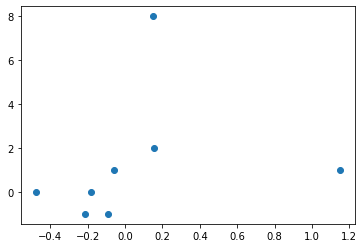

In [104]:
plt.scatter(power_and_mem['GammaLow_log_chg'], power_and_mem['Delay_Mem_Stim'] - power_and_mem['Delay_Mem_Sham'])

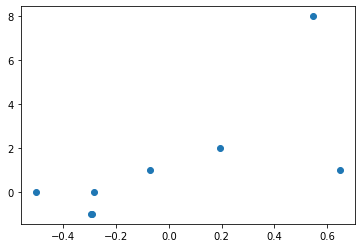

In [105]:
plt.scatter(power_and_mem['Beta_log_chg'], power_and_mem['Delay_Mem_Stim'] - power_and_mem['Delay_Mem_Sham'])

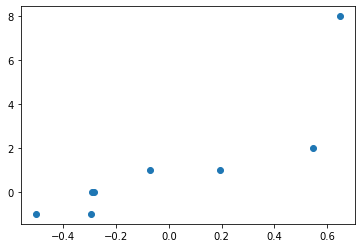

In [106]:
plt.scatter(power_and_mem['Beta_log_chg'].sort_values(), (power_and_mem['Delay_Mem_Stim'] - power_and_mem['Delay_Mem_Sham']).sort_values())

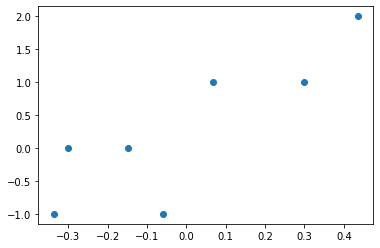

In [107]:
pm_filtered = power_and_mem[power_and_mem['ID'] != 111]
ys = pm_filtered['Delay_Mem_Stim'] - pm_filtered['Delay_Mem_Sham']
plt.scatter(pm_filtered['GammaXHigh_log_chg'], ys)

In [108]:
scipy.stats.kendalltau(power_and_mem[power_and_mem['ID'] != 111]['GammaXHigh_log_chg'], ys[ys < 8])

KendalltauResult(correlation=0.7200822998230957, pvalue=0.029435936934382418)